<a href="https://colab.research.google.com/github/dunliangyang2010/AutoKeras/blob/main/Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install autokeras

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import autokeras as ak

In [4]:
# read CSV into DataFrame, encoding=latin
emails_dataset = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Automated-Machine-Learning-with-AutoKeras/main/spam.csv', encoding='latin-1')
emails_dataset 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Preprocessing

In [5]:
# drop useless columns
emails_dataset.drop(
    ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True 
)

# rename columns
emails_dataset.rename(
    columns={'v1': 'spam', 'v2': 'message'}, inplace=True
)

# map ham & spam into 0&1
emails_dataset['spam']=emails_dataset['spam'].map({'ham':0 , 'spam':1})

emails_dataset.head(5)

,spam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# split into training and test dataset
# AutoKeras TextClassifer 無法吃Pandas series格式input, 故需轉成ndarray
x = emails_dataset['message'].to_numpy()
y = emails_dataset['spam'].to_numpy()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Training

In [7]:
callbacks = [tf.keras.callbacks.EarlyStopping(patience=3)]

clf = ak.TextClassifier(max_trials=2)
clf.fit(x_train, y_train, callbacks=callbacks)

Trial 2 Complete [00h 00m 46s]
val_loss: 0.0597558468580246

Best val_loss So Far: 0.05940968915820122
Total elapsed time: 00h 01m 24s
INFO:tensorflow:Oracle triggered exit
140/140 [==============================] - 6s 24ms/step - loss: 0.3243 - accuracy: 0.8784
INFO:tensorflow:Assets written to: ./text_classifier/best_model/assets


In [8]:
# evaluate
clf.evaluate(x_test, y_test)

35/35 [==============================] - 1s 12ms/step - loss: 0.1360 - accuracy: 0.9794


[0.13598549365997314, 0.9793722033500671]

In [10]:
# predict first 10 data
predicted = clf.predict(x_test[:10])
for i in range(10):
  # 觀察每封信的內容(預覽前50個字元)
  print('Test:', x_test[i][:50], '...')
  
  # 將spam與message轉回0,1顯示
  print('Predict:', 'spam' if predicted[i]==1 else 'message')
  print('Real:', 'spam' if y_test[i]==1 else 'message')
  print('')

1/1 [==============================] - 0s 31ms/step
Test: Funny fact Nobody teaches volcanoes 2 erupt, tsuna ...
Predict: spam
Real: message

Test: I sent my scores to sophas and i had to do seconda ...
Predict: message
Real: message

Test: We know someone who you know that fancies you. Cal ...
Predict: spam
Real: spam

Test: Only if you promise your getting out as SOON as yo ...
Predict: message
Real: message

Test: Congratulations ur awarded either å£500 of CD gift ...
Predict: spam
Real: spam

Test: I'll text carlos and let you know, hang on ...
Predict: message
Real: message

Test: K.i did't see you.:)k:)where are you now? ...
Predict: message
Real: message

Test: No message..no responce..what happend? ...
Predict: message
Real: message

Test: Get down in gandhipuram and walk to cross cut road ...
Predict: message
Real: message

Test: You flippin your shit yet? ...
Predict: message
Real: message



# Model visualization

In [11]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 expand_last_dim (ExpandLast  (None, 1)                0         
 Dim)                                                            
                                                                 
 text_vectorization (TextVec  (None, 512)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 512, 64)           320064    
                                                                 
 dropout (Dropout)           (None, 512, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 508, 256)          82176 

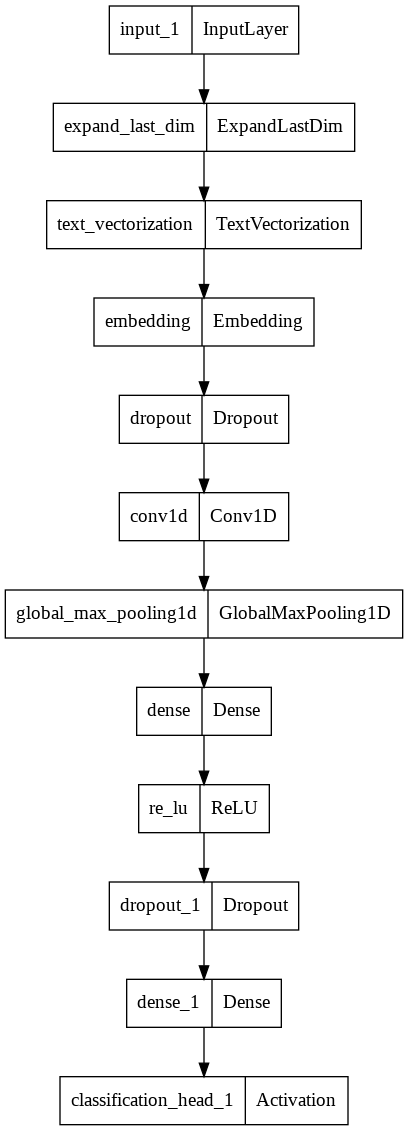

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [14]:
!cp -r /content/text_classifier/best_model /content/drive/MyDrive/model/AutoKeras/TextClassifier